<a href="https://colab.research.google.com/github/LIMDANBI/2021-2/blob/main/2021-2/AI%2BX/DataVisualization/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()

mpl.rc('font', family=font_name)

mpl.font_manager._rebuild()

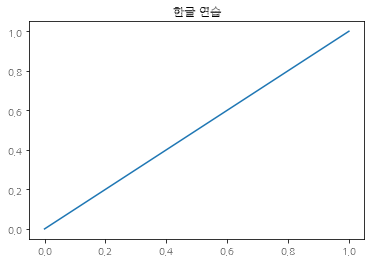

In [2]:
plt.plot([0,1], [0,1])
plt.title('한글 연습')
plt.show()

# 서울시 범죄 현황 분석

In [5]:
import numpy as np
import pandas as pd

crime_raw_data = pd.read_csv('/content/drive/MyDrive/ ai+x/DataVisualization/2018년.csv', encoding = 'euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132


In [6]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [7]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

In [8]:
crime_raw_data['구분'].unique()

array(['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포',
       '성동', '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동',
       '종암', '구로', '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서'],
      dtype=object)

In [9]:
crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [11]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index = ['구분'], columns = ['죄종', '발생검거'], aggfunc = np.sum
)

crime_station

건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    352  406   8   9   8   5   836  2020  1890  2188
강동    143  170   7   7   3   3   765  1515  1871  2224
강북    135  188   7   7   6   8   603  1112  1992  2122
강서    246  269   3   6   9  11   982  1724  2229  2619
관악    305  352  12  10   9   9  1025  2012  2302  2643
광진    184  229   1   2   5   7   974  1769  1625  1908
구로    181  250   9   9   8   8   787  1717  2353  2826
금천    185  200   6   7   6   6   645  1168  1725  1912
남대문    52   75   4   6   1   1   417   798   709   779
노원    173  194   5   5   4   5   585  1422  1958  2381
도봉    117  113   3   5   1   1   431   781  1124  1349
동대문   112  145   4   5   2   2   930  1447  1920  2081
동작    154  288   7   7   3   3   532  1151  1394  1651
마포    396  473   7   6   6   6   882  2011  2278  2676
방배     41   63   1   1   0   0   165   369   423   487
서대문   189  206   3   3   4   5   585  1062  1235  1526
서부     52   58   0   0   4   4   325   505   711   807
서초    274  407   4   4   5   5   673  1482  1597  1908
성동    102  126   8   5   2   2   487   999  1188  1325
성북     90  125   0   0   1   1   298   600   798   886
송파    254  309   8   6   6   5  1034  2352  2749  3135
수서    171  194   2   5   5   5   481   984  1443  1697
양천    111  120  14   4   3   2   646  1384  1685  2005
영등포   267  391   6   8  15  17  1064  2292  2570  3132
용산    285  331   2   3   1   1   522  1096  1733  1980
은평    117  130   1   1   4   4   491   773  1158  1308
종로    114  136   0   1   4   5   398   744   993  1131
종암     50   58   2   1   5   6   337   564   696   801
중랑    145  174   3   3   5   4   876  1526  2193  2581
중부     63  132   7   5   1   1   415  1057  1010  1176
혜화     58  100   2   2   1   1   340   739   712   831

In [12]:
crime_station.columns

MultiIndex([('건수', '강간', '검거'),
            ('건수', '강간', '발생'),
            ('건수', '강도', '검거'),
            ('건수', '강도', '발생'),
            ('건수', '살인', '검거'),
            ('건수', '살인', '발생'),
            ('건수', '절도', '검거'),
            ('건수', '절도', '발생'),
            ('건수', '폭력', '검거'),
            ('건수', '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [13]:
crime_station.columns = crime_station.columns.droplevel([0])
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [14]:
crime_station['강도', '검거']

구분
강남      8
강동      7
강북      7
강서      3
관악     12
광진      1
구로      9
금천      6
남대문     4
노원      5
도봉      3
동대문     4
동작      7
마포      7
방배      1
서대문     3
서부      0
서초      4
성동      8
성북      0
송파      8
수서      2
양천     14
영등포     6
용산      2
은평      1
종로      0
종암      2
중랑      3
중부      7
혜화      2
Name: (강도, 검거), dtype: int64

In [15]:
crime_station['살인', '발생']

구분
강남      5
강동      3
강북      8
강서     11
관악      9
광진      7
구로      8
금천      6
남대문     1
노원      5
도봉      1
동대문     2
동작      3
마포      6
방배      0
서대문     5
서부      4
서초      5
성동      2
성북      1
송파      5
수서      5
양천      2
영등포    17
용산      1
은평      4
종로      5
종암      6
중랑      4
중부      1
혜화      1
Name: (살인, 발생), dtype: int64

In [16]:
crime_station.loc['강남', ('강도', '발생')]

9

In [17]:
crime_station.head()

죄종     강간       강도     살인        절도          폭력      
발생검거   검거   발생  검거  발생 검거  발생    검거    발생    검거    발생
구분                                                   
강남    352  406   8   9  8   5   836  2020  1890  2188
강동    143  170   7   7  3   3   765  1515  1871  2224
강북    135  188   7   7  6   8   603  1112  1992  2122
강서    246  269   3   6  9  11   982  1724  2229  2619
관악    305  352  12  10  9   9  1025  2012  2302  2643

In [18]:
tmp = crime_station.columns.get_level_values(0) + \
crime_station.columns.get_level_values(1)

tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [19]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188
강동,143,170,7,7,3,3,765,1515,1871,2224
강북,135,188,7,7,6,8,603,1112,1992,2122
강서,246,269,3,6,9,11,982,1724,2229,2619
관악,305,352,12,10,9,9,1025,2012,2302,2643


In [20]:
crime_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   강간검거    31 non-null     int64
 1   강간발생    31 non-null     int64
 2   강도검거    31 non-null     int64
 3   강도발생    31 non-null     int64
 4   살인검거    31 non-null     int64
 5   살인발생    31 non-null     int64
 6   절도검거    31 non-null     int64
 7   절도발생    31 non-null     int64
 8   폭력검거    31 non-null     int64
 9   폭력발생    31 non-null     int64
dtypes: int64(10)
memory usage: 3.9+ KB


In [21]:
real_gu = {'종로구' : ['종로', '혜화'], '중구' : ['남대문', '중부'],
           '용산구' : ['용산'], '성동구' : ['성동'],
           '광진구' : ['광진'], '동대문구' : ['동대문'],
           '중랑구' : ['중랑'], '성북구' : ['성북', '종암'],
           '강북구' : ['강북'], '도봉구' : ['도봉'],
           '노원구' : ['노원'], '은평구' : ['서부', '은평'],
           '서대문구' : ['서대문'], '마포구' : ['마포'],
           '양천구' : ['양천'], '강서구' : ['강서'],
           '구로구' : ['구로'], '금천구' : ['금천'],
           '영등포구' : ['영등포'], '동작구' : ['동작'],
           '관악구' : ['관악'], '서초구' : ['방배', '서초'],
           '강남구' : ['강남', '수서'], '송파구' : ['송파'],
           '강동구' : ['강동']}

In [22]:
for gu_name, station_name in real_gu.items():
    if '강남' in station_name:
        print(gu_name)

강남구


In [24]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [25]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

tmp_gu

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [26]:
crime_station['구'] = tmp_gu
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188,강남구
강동,143,170,7,7,3,3,765,1515,1871,2224,강동구
강북,135,188,7,7,6,8,603,1112,1992,2122,강북구
강서,246,269,3,6,9,11,982,1724,2229,2619,강서구
관악,305,352,12,10,9,9,1025,2012,2302,2643,관악구
광진,184,229,1,2,5,7,974,1769,1625,1908,광진구
구로,181,250,9,9,8,8,787,1717,2353,2826,구로구
금천,185,200,6,7,6,6,645,1168,1725,1912,금천구
남대문,52,75,4,6,1,1,417,798,709,779,중구


In [31]:
crime_gu = pd.pivot_table(crime_station, index = '구', aggfunc = np.sum)
crime_gu

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885
강동구,143,170,7,7,3,3,765,1515,1871,2224
강북구,135,188,7,7,6,8,603,1112,1992,2122
강서구,246,269,3,6,9,11,982,1724,2229,2619
관악구,305,352,12,10,9,9,1025,2012,2302,2643
광진구,184,229,1,2,5,7,974,1769,1625,1908
구로구,181,250,9,9,8,8,787,1717,2353,2826
금천구,185,200,6,7,6,6,645,1168,1725,1912
노원구,173,194,5,5,4,5,585,1422,1958,2381


In [32]:
crime_gu['살인발생'].sort_values(ascending = False).head()

구
영등포구    17
강서구     11
강남구     10
관악구      9
강북구      8
Name: 살인발생, dtype: int64

In [33]:
crime_gu['폭력발생'].sort_values(ascending = False).head()

구
강남구     3885
송파구     3135
영등포구    3132
구로구     2826
마포구     2676
Name: 폭력발생, dtype: int64

In [34]:
crime_gu['강도발생'].sort_values(ascending = False).head()

구
강남구     14
중구      11
관악구     10
구로구      9
영등포구     8
Name: 강도발생, dtype: int64

In [35]:
crime_gu['절도발생'].sort_values(ascending = False).head()

구
강남구     3004
송파구     2352
영등포구    2292
관악구     2012
마포구     2011
Name: 절도발생, dtype: int64

In [36]:
crime_gu['강간발생'].sort_values(ascending = False).head()

구
강남구     600
마포구     473
서초구     470
영등포구    391
관악구     352
Name: 강간발생, dtype: int64

In [37]:
crime_gu['강도검거']/crime_gu['강도발생']

구
강남구     0.714286
강동구     1.000000
강북구     1.000000
강서구     0.500000
관악구     1.200000
광진구     0.500000
구로구     1.000000
금천구     0.857143
노원구     1.000000
도봉구     0.600000
동대문구    0.800000
동작구     1.000000
마포구     1.166667
서대문구    1.000000
서초구     1.000000
성동구     1.600000
성북구     2.000000
송파구     1.333333
양천구     3.500000
영등포구    0.750000
용산구     0.666667
은평구     1.000000
종로구     0.666667
중구      1.000000
중랑구     1.000000
dtype: float64

In [38]:
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[num].div(crime_gu[den].values)

,강간검거,강도검거,살인검거,절도검거,폭력검거
구,,,,,
강남구,0.871667,0.714286,1.300000,0.438415,0.857915
강동구,0.841176,1.000000,1.000000,0.504950,0.841277
강북구,0.718085,1.000000,0.750000,0.542266,0.938737
강서구,0.914498,0.500000,0.818182,0.569606,0.851088
관악구,0.866477,1.200000,1.000000,0.509443,0.870980
광진구,0.803493,0.500000,0.714286,0.550594,0.851677
구로구,0.724000,1.000000,1.000000,0.458358,0.832626
금천구,0.925000,0.857143,1.000000,0.552226,0.902197
노원구,0.891753,1.000000,0.800000,0.411392,0.822344


In [39]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values) * 100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885,87.166667,71.428571,130.000000,43.841545,85.791506
강동구,143,170,7,7,3,3,765,1515,1871,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,135,188,7,7,6,8,603,1112,1992,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,246,269,3,6,9,11,982,1724,2229,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,305,352,12,10,9,9,1025,2012,2302,2643,86.647727,120.000000,100.000000,50.944334,87.097995


In [40]:
crime_gu = crime_gu.drop(columns = num)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,130.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,120.000000,100.000000,50.944334,87.097995


In [43]:
crime_gu[target] > 100 # 작년에 발생했던 사건이 올해 검거됐을 수 있기 때문에 

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,False,False,False,False,False
강동구,False,False,False,False,False
강북구,False,False,False,False,False
강서구,False,False,False,False,False
관악구,False,False,False,False,False
광진구,False,False,False,False,False
구로구,False,False,False,False,False
금천구,False,False,False,False,False
노원구,False,False,False,False,False


In [44]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995
광진구,229,2,7,1769,1908,80.349345,50.000000,71.428571,55.059356,85.167715
구로구,250,9,8,1717,2826,72.400000,100.000000,100.000000,45.835760,83.262562
금천구,200,7,6,1168,1912,92.500000,85.714286,100.000000,55.222603,90.219665
노원구,194,5,5,1422,2381,89.175258,100.000000,80.000000,41.139241,82.234355


In [45]:
crime_gu.rename(columns = {'강간발생' : '강간',
                           '강도발생' : '강도',
                           '살인발생' : '살인',
                           '절도발생' : '절도',
                           '폭력발생' : '폭력'},
                inplace = True)
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [46]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000
강동구,0.176471,0.500000,0.283333,0.504328,0.572458
강북구,0.470588,0.500000,0.313333,0.370173,0.546203
강서구,0.647059,0.428571,0.448333,0.573901,0.674131
관악구,0.529412,0.714286,0.586667,0.669774,0.680309


In [47]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,0.176471,0.500000,0.283333,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,0.470588,0.500000,0.313333,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,0.647059,0.428571,0.448333,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,0.529412,0.714286,0.586667,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995


In [48]:
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis = 1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,0.917647
강동구,0.176471,0.500000,0.283333,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698,0.407318
강북구,0.470588,0.500000,0.313333,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704,0.440060
강서구,0.647059,0.428571,0.448333,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820,0.554399
관악구,0.529412,0.714286,0.586667,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995,0.636089


In [49]:
crime_gu_norm['범죄'].sort_values(ascending = False).head()

구
강남구     0.917647
영등포구    0.758451
관악구     0.636089
마포구     0.585618
구로구     0.565819
Name: 범죄, dtype: float64

In [50]:
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col2], axis = 1)
crime_gu_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,0.588235,1.000000,1.000000,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,0.917647,77.645658
강동구,0.176471,0.500000,0.283333,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698,0.407318,83.748079
강북구,0.470588,0.500000,0.313333,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704,0.440060,78.981767
강서구,0.647059,0.428571,0.448333,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820,0.554399,73.067475
관악구,0.529412,0.714286,0.586667,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995,0.636089,84.938011


In [51]:
crime_gu_norm['검거'].sort_values(ascending = False).head()

구
은평구    88.422435
중랑구    85.141076
관악구    84.938011
금천구    84.731311
양천구    84.643240
Name: 검거, dtype: float64

In [52]:
crime_gu_norm['검거'].sort_values().head()

구
광진구     68.400997
종로구     71.909294
영등포구    72.000054
강서구     73.067475
동작구     76.825315
Name: 검거, dtype: float64

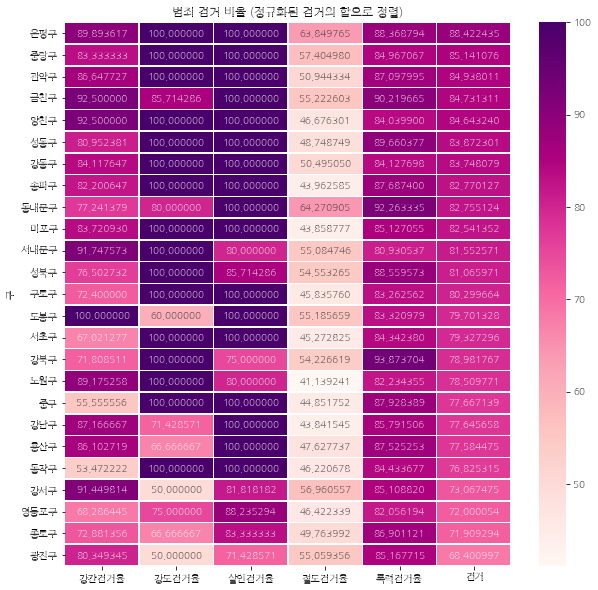

In [58]:
import seaborn as sns

target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by = '검거', ascending = False) # 검거율 높은 순으로 정렬

plt.figure(figsize = (10, 10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot = True, fmt = 'f', linewidth = .5, cmap = 'RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

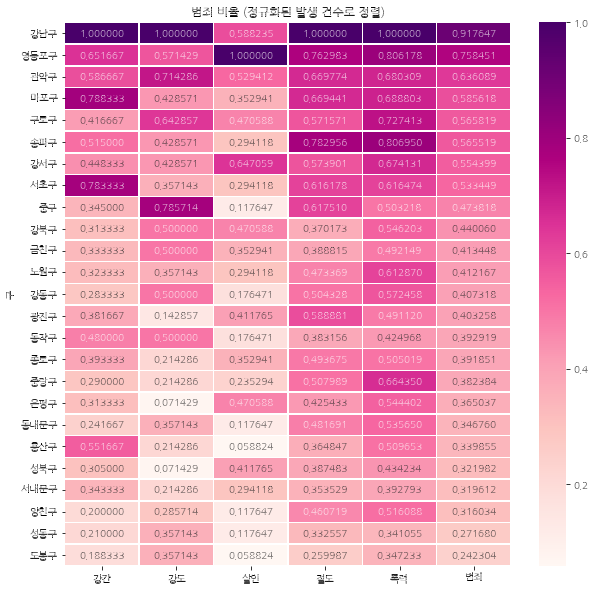

In [59]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_gu_norm_sort = crime_gu_norm.sort_values(by = '범죄', ascending = False) # 범죄율 높은 순으로 정렬

plt.figure(figsize = (10, 10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot = True, fmt = 'f', linewidth = .5, cmap = 'RdPu')
plt.title('범죄 비율 (정규화된 발생 건수로 정렬)')
plt.show()

# 지도 시각화

In [69]:
import folium

m = folium.Map(location=[45.5236, -122.6750])
m

In [70]:
folium.Map(location = [22.20111, 113.54417], tiles = 'Stamen Toner', zoom_start = 13)

In [71]:
folium.Map(location = [22.20111, 113.54417], tiles = 'Stamen Terrain', zoom_start = 13)

In [72]:
folium.Map(location = [22.20111, 113.54417], tiles = 'Stamen Watercolor', zoom_start = 13)

In [73]:
my_map = folium.Map(location = [45.372, -121.6972], zoom_start = 12,
                    tiles = 'Stamen Terrain')

folium.Marker([45.3288, -121.6625],
              popup = '<i>Mt. Hood Meadows</i>').add_to(my_map)
folium.Marker([45.3311, -121.7113],
              popup = '<b>Timberline Lodge</b>').add_to(my_map)

my_map

In [77]:
m = folium.Map(location = [45.5236, -122.6750], tiles = 'Stamen Toner',
               zoom_start = 13)

folium.CircleMarker(location = [45.5215, -122.6261], radius=50,
                    popup = 'Laurelhurst Park', color = '#3186cc',
                    fill = True, fill_color = '#3186cc').add_to(m)

m

In [76]:
import json


geo_str = json.load(open('/content/drive/MyDrive/ ai+x/DataVisualization/skorea_municipalities_geo_simple.json', encoding = 'utf-8'))
geo_str

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
       37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]],
    'type': 'Polygon'},
   'id': '강동구',
   'properties': {'base_year': '2013',
    'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089],
      [127.14672806823502, 37.51415680680291],
      [127.1634944215765, 37.497445406097484],
      [127.14206058413274, 37.47089819098501],
      [127.12440571080893, 37.46240445587048],
  

In [78]:
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [79]:
crime_gu.reset_index().rename(columns = {"index": "구"})
crime_gu.rename_axis('구').reset_index()
crime_gu.index.name = '구'
crime_gu = crime_gu.reset_index()
crime_gu.head()

,구,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
0,강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
1,강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
2,강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
3,강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
4,관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [80]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 12,
                    tiles = 'Stamen Toner')

folium.Choropleth(
    geo_data = geo_str,
    data = crime_gu, columns = ['구','살인'],
    nan_fill_color = 'purple', nan_fill_opacity = 0.4,
    key_on = 'feature.id', fill_color = 'PuRd',
    legend_name = 'Number of murder cases'
).add_to(my_map)

my_map

In [81]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 12,
                    tiles = 'Stamen Toner')

folium.Choropleth(
    geo_data = geo_str,
    data = crime_gu, columns = ['구','절도'],
    nan_fill_color = 'purple', nan_fill_opacity = 0.4,
    key_on = 'feature.id', fill_color = 'PuRd',
    legend_name = 'Number of theft cases'
).add_to(my_map)

my_map

In [82]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 12,
                    tiles = 'Stamen Toner')

folium.Choropleth(
    geo_data = geo_str,
    data = crime_gu, columns = ['구','폭력'],
    nan_fill_color = 'purple', nan_fill_opacity = 0.4,
    key_on = 'feature.id', fill_color = 'PuRd',
    legend_name = 'Number of violence cases'
).add_to(my_map)

my_map